#  RFM Marketing Analysis Project

## Introduction  
Recency, Frequency, and Monetary Value (RFM) is a marketing analysis framework used to segment customers based on their purchasing behavior. This project aims to analyze customer transaction data and apply RFM segmentation to identify high-value customers.




---

## Objectives  
- Implement RFM analysis to categorize customers.  
- Identify top-performing customers based on purchasing patterns.  
- Provide actionable insights for marketing strategies.  

---

## RFM Model Breakdown  
RFM analysis is based on three key factors:  

- **Recency (R):** How recently a customer has made a purchase.  
- **Frequency (F):** How often a customer makes a purchase.  
- **Monetary Value (M):** How much money a customer spends on purchases.  

Each customer is assigned an RFM score based on these factors, which helps in segmentation.
 
---
## Summary

This RFM analysis project segments customers based on their purchasing behavior (Recency, Frequency, Monetary value) to inform data-driven marketing strategies.  Leveraging customer transaction data, the project identifies key customer groups, from high-value VIPs and loyal customers to at-risk and lost customers.  The analysis involves data cleaning and preprocessing, RFM score calculation, and customer segmentation.  Actionable insights are derived for each segment, enabling targeted marketing campaigns aimed at improving customer retention, increasing sales, and maximizing marketing ROI.  The results are presented through clear visualizations and detailed segment descriptions to empower data-driven decision-making.

---



## Methodology

This project employs a structured RFM analysis methodology, comprising the following stages:

1. **Data Acquisition and Preparation:**
    * Data Source: 
    * Data Cleaning:
        * Missing Value Handling: 
        * Duplicate Removal: 
        * Inconsistency Correction: 
        * Data Type Conversion: Date to datetime
        * CustomerID Conversion: To integer
    * Data Description: Examination of dataset structure and characteristics

2. **RFM Score Calculation:**
    * Snapshot Date: 
    * Recency Calculation: Days since last purchase
    * Frequency Calculation: Number of transactions
    * Monetary Value Calculation: Total amount spent

3. **Customer Segmentation:**
    * Quantile-Based Scoring: Quintiles (1-5 scale) for R, F, and M
    * Overall RFM Score: Average of R, F, and M scores
    * Segment Definitions: Based on overall RFM score thresholds
        * Best Customers (VIPs): 
        * Potential Loyalists: 
        * At-Risk Customers: 
        * Lost Customers: 
        * Churned Customers: 

4. **Visualization and Reporting:**
    * Data Visualization: Bar charts, pie charts
    * Report Generation: Summary of findings, segment profiles, recommendations

5. **Insights and Recommendations:**
    * Customer Behavior Analysis: For each segment
    * Targeted Marketing Strategies: Developed for each segment
    * Retention Strategies: For at-risk customers


    
---

## Tools & Libraries  
- **Python Libraries:** `pandas`, `numpy`, `matplotlib`, `seaborn`, `scikit-learn` 

---

## Expected Outcomes  
- Clear segmentation of customers.  
- Data-driven marketing strategies.  
- Improved customer retention and engagement.  

---

## Next Steps  
- Implement RFM segmentation using Python.  
- Visualize the findings with dashboards.  
- Apply machine learning for further insights.  

---

## **1. Data Cleaning & Preprocessing**

In [1]:
# Import needed libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = "upd_RFMData.csv"
df = pd.read_csv(file_path)

# Display basic information and first few rows
df.head()

,InvoiceNo,StockCode,Description,Quantity,Date,Price,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12-01-2023 08:26:00 AM,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12-01-2023 08:26:00 AM,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12-01-2023 08:26:00 AM,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12-01-2023 08:26:00 AM,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12-01-2023 08:26:00 AM,3.39,17850.0,United Kingdom


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   Date         541909 non-null  object 
 5   Price        541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [3]:
df.shape

(541909, 8)

Let's start by inspecting the data structure.

The dataset contains 541,909 transactions with the following 8 key columns:

- **InvoiceNo: Unique identifier for each transaction.**
- **StockCode: Product code.**
- **Description: Product name (has some missing values).**
- **Quantity: Number of units purchased.**
- **Date: Transaction timestamp (needs proper datetime conversion).**
- **Price: Unit price of the product.**
- **CustomerID: Unique identifier for each customer (has missing values).**
- **Country: Country where the transaction occurred.**

In [4]:
# Convert 'Date' to datetime format
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Remove missing CustomerID values
df = df.dropna(subset=['CustomerID'])

# Convert CustomerID to integer type
df['CustomerID'] = df['CustomerID'].astype(int)

# Remove transactions with negative quantity (returns)
df = df[df['Quantity'] > 0]

In [5]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,Date,Price,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2023-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2023-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2023-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2023-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2023-12-01 08:26:00,3.39,17850,United Kingdom


## 2. **RFM Score Calculation:**  

In [6]:
# 2: RFM Score Calculation

# Define snapshot date as the last transaction date in the dataset
snapshot_date = df['Date'].max()

# Group by CustomerID to calculate RFM metrics
rfm_df = df.groupby('CustomerID').agg({
    'Date': lambda x: (snapshot_date - x.max()).days,  # Recency
    'InvoiceNo': 'count',  # Frequency
    'Price': lambda x: (x * df.loc[x.index, 'Quantity']).sum()  # Monetary Value
})

# Rename columns
rfm_df.rename(columns={'Date': 'Recency', 'InvoiceNo': 'Frequency', 'Price': 'Monetary'}, inplace=True)

# Display the first few rows of the RFM table
rfm_df.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346,326,1,77183.60
12347,1,182,4310.00
12348,74,31,1797.24
12349,18,73,1757.55
12350,310,17,334.40


## The RFM table has been successfully created:

- Recency (R): Number of days since the customer's last purchase.
- Frequency (F): Total number of purchases made by the customer.
- Monetary Value (M): Total amount spent by the customer.

--- 
## 3. **Customer Segmentation:**  

In [7]:
# Assign RFM Scores

# Define quantile-based scoring function (1-5 scale, higher is better)
rfm_df['R'] = pd.qcut(rfm_df['Recency'], q=5, labels=[5, 4, 3, 2, 1])
rfm_df['F'] = pd.qcut(rfm_df['Frequency'], q=5, labels=[1, 2, 3, 4, 5])
rfm_df['M'] = pd.qcut(rfm_df['Monetary'], q=5, labels=[1, 2, 3, 4, 5])

# Create a combined RFM score (concatenating R, F, M scores as a string)
rfm_df['RFM_Overall'] = ((rfm_df['R'].astype(int) + rfm_df['F'].astype(int) + rfm_df['M'].astype(int)) / 3).round().astype(int)

# Drom the 'Recency', 'Frequency', 'Monetary columns
rfm_df.drop(columns=['Recency', 'Frequency', 'Monetary'], inplace=True)
# Display the first few rows with scores
rfm_df.head()

,R,F,M,RFM_Overall
CustomerID,,,,
12346,1,1,5,2
12347,5,5,5,5
12348,2,3,4,3
12349,4,4,4,4
12350,1,2,2,2


 ### The RFM scoring has been completed:

- Each customer is assigned a score from 1 to 5 for Recency (R), Frequency (F), and Monetary (M) based on quantiles.
- The RFM_Overall is a combination of the R, F, M (e.g. R F M :"2 3 4" :<br>   This is (2 + 3 + 4)/3 = 3

In [8]:
# Change columns R,F,M back to Recency', 'Frequency'and 'Monetary' for readability
rfm_df.rename(columns={'R': 'Recency', 'F': 'Frequency', 'M': 'Monetary'}, inplace=True)
rfm_df.head()

,Recency,Frequency,Monetary,RFM_Overall
CustomerID,,,,
12346,1,1,5,2
12347,5,5,5,5
12348,2,3,4,3
12349,4,4,4,4
12350,1,2,2,2


In [9]:
# Define function to categorize customers
def categorize_rfm(score):
    if score >= 4.5:
        return "Best Customers (VIPs)"
    elif score >= 3.5:
        return "Potential Loyalists"
    elif score >= 2.5:
        return "At-Risk Customers"
    elif score >= 1.5:
        return "Lost Customers"
    else:
        return "Churned Customers"

# Apply categorization and make the value whole
rfm_df["Customer_Segment"] = round(rfm_df["RFM_Overall"].apply(categorize_rfm),0)

# Save or display results
#df.to_csv("Updated_RFM_Segments.csv", index=False)
rfm_df[["RFM_Overall", "Customer_Segment"]].head()

,RFM_Overall,Customer_Segment
CustomerID,,
12346,2,Lost Customers
12347,5,Best Customers (VIPs)
12348,3,At-Risk Customers
12349,4,Potential Loyalists
12350,2,Lost Customers


## Customer Segments Identified (Based on RFM_overall Score):
- **5 - Best Customers (VIPs):** Frequent, high-value buyers with recent activity.
- **4 - Potential Loyalists:** Active but with slightly lower frequency or spend.
- **3 - At-Risk Customers:** Moderate spending and engagement; need incentives to return.
- **2 - Lost Customers:** Haven’t purchased in a while, low engagement.
- **1 - Churned Customers:** Inactive with minimal spending, possibly lost.


# 4. Visualisation

In [10]:
# Count the number of customers in each segment
segment_counts = rfm_df["Customer_Segment"].value_counts()


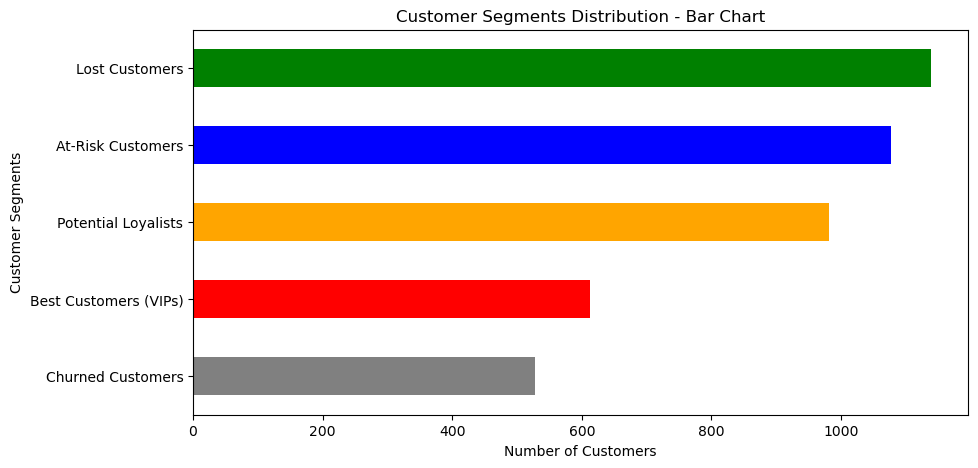

In [11]:
# Bar chart
plt.figure(figsize=(10, 5))
segment_counts.plot(kind="barh", color=["green", "blue", "orange", "red", "gray"])
plt.xlabel("Number of Customers")
plt.ylabel("Customer Segments")
plt.title("Customer Segments Distribution - Bar Chart")
plt.gca().invert_yaxis()  # To display highest category on top
plt.show()

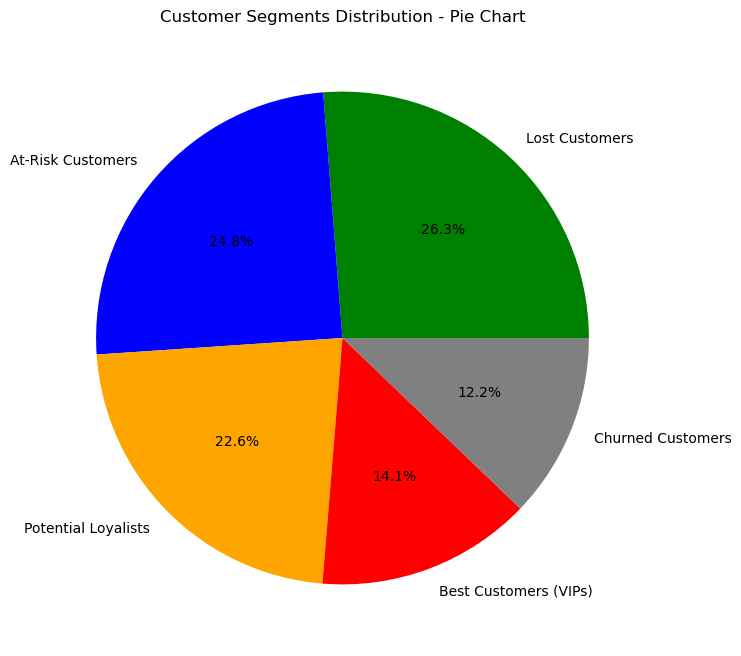

In [12]:
# Pie chart
plt.figure(figsize=(8, 8))
segment_counts.plot(kind="pie", autopct="%1.1f%%", colors=["green", "blue", "orange", "red", "gray"])
plt.ylabel("")  # Hide y-axis label for better presentation
plt.title("Customer Segments Distribution - Pie Chart")
plt.show()


## RFM Ratings and Applied Colors  

| **RFM Ratings**            | **Applied Colors** | **Grade**                 | **Tag/Description**                               |
|----------------------------|-------------------|---------------------------|-------------------------------------------------|
| **Best Customers (VIPs)**  | 🔴 Red (Best)    | **A+ (Excellent)**        | Most Engaged & High Spenders (Frequent, high-value buyers with recent activity.) |
| **Loyal Customers**        | 🟠 Orange        | **A (Very Good)**         | Strongly Engaged & Repeat Buyers (Active but with slightly lower frequency or spend.) |
| **Potential Loyalists**    | 🟡 Yellow        | **B (Good)**              | Emerging Loyalty & Moderate Spenders (Show interest and moderate spending; need incentives to convert.) |
| **At-Risk Customers**      | 🟢 Green         | **C (Average)**           | Declining Engagement & Moderate Spend (Previously active but now less frequent; needs reactivation.) |
| **Lost Customers**         | 🔵 Blue (Worst)  | **D (Poor)**              | Low Engagement & Rare Purchasers (Haven’t purchased in a while; might need win-back offers.) |
| **Churned Customers**      | ⚫ Gray (Worst)  | **F (Failing)**           | Inactive & Likely Lost (Minimal spending; last chance campaigns may work.) |

---


# 5. **Insights and Recommendations:**

## Customer Behavior Insights

## Recency Insights:
- **Customers with RFM_overall = 5 (Best Customers)** are highly engaged and make frequent purchases.
- **Customers with RFM_overall = 1-2 (Lost/Churned Customers)** haven't purchased in a long time, signaling a risk of churn.

## Frequency Insights:
- **Customers with RFM_overall = 5** are the most loyal buyers, making purchases regularly.
- **Customers with RFM_overall = 2-3** may be occasional buyers, needing re-engagement.

## Monetary Insights:
- **Customers with RFM_overall = 5** are high spenders, indicating VIP status.
- **Customers with RFM_overall = 1-2** spend the least, possibly being bargain shoppers or inactive users.

## Customer Segments Identified (Based on RFM_overall Score):
- **5 - Best Customers (VIPs):** Frequent, high-value buyers with recent activity.
- **4 - Potential Loyalists:** Active but with slightly lower frequency or spend.
- **3 - At-Risk Customers:** Moderate spending and engagement; need incentives to return.
- **2 - Lost Customers:** Haven’t purchased in a while, low engagement.
- **1 - Churned Customers:** Inactive with minimal spending, possibly lost.

---

# Targeted Marketing Strategies Based on RFM Score

## 5 - Best Customers (VIPs)
### Strategy:
- Offer VIP rewards, exclusive discounts, and priority access to retain engagement.
- Personalized recommendations based on purchase history.
- Encourage referrals with loyalty bonuses.

### Tactics:
- Personalized emails with early-bird offers.
- Exclusive membership perks.
- Referral programs.

## 4 - Potential Loyalists
### Strategy:
- Strengthen engagement by offering bundle deals and personalized promotions.
- Nurture their loyalty through reward programs.

### Tactics:
- Upsell & cross-sell suggestions via email.
- Social media engagement with targeted ads.
- Thank-you discounts for repeated purchases.

## 3 - At-Risk Customers
### Strategy:
- Use reactivation emails with special offers to encourage return purchases.
- Offer discounts on previously bought items.

### Tactics:
- “We Miss You” campaigns with limited-time discounts.
- Retargeting ads on Facebook, Google, and Instagram.
- Conduct surveys to understand drop-off reasons.

## 2 - Lost Customers
### Strategy:
- Implement win-back campaigns to encourage another purchase.
- Highlight new products or improvements.

### Tactics:
- “Come Back & Save” email promotions.
- Personalized SMS reminders.
- Free shipping for first-time return customers.

## 1 - Churned Customers
### Strategy:
- Accept that some customers may be permanently lost but attempt a final re-engagement.
- Offer steep discounts or an incentive for a last purchase.

### Tactics:
- Drip email sequence with limited-time offers.
- Abandoned cart reminders if applicable.
- Special “One Last Deal” campaign before removing them from targeting lists.


|**Yours**         |
|----------------  |
|Toluwalope  ISrael|
|✈ 🛴🚲🚲🚲🚲🚅🚅🌧🌧🌧🌧🌧👌🗼😁😘❤💖  |